<a href="https://colab.research.google.com/github/andrewmuhoro/MilkGrade/blob/main/Predict_Milk_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In this notebook, the goal is to predict the milk quality. The central goal is to design a model that makes proper classifications for new milk samples. In other words, one which exhibits good generalization. by seven observable milk variables

We can classify milk into three groups: low, medium, and high quality. The milk dataset contains 429 instances of low quality, 374 instances of medium quality, and 256 instances of high quality.

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk. 
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color:

1. pH: This feature defines pH of the milk, which is in the range of 3 to 9.5. 

2. Temperature: This feature defines the temperature of the milk, and its range is from 34'C to 90'C.

3. Taste: This feature defines the taste of the milk and takes the possibles values: 1 (good) or 0 (bad).

4. Odor: This feature defines the odor of the milk and takes the possibles values: 1 (good) or 0 (bad).

5. Fat: This feature defines fat of the milk and takes the possibles values: 1 (good) or 0 (bad).

6. Turbidity: This feature defines the turbidity of the milk and takes the possibles values: 1 (good) or 0 (bad).

7. Color: This feature defines the color of the milk, which is in the range of 240 to 255.

8. Grade: This is the target and takes the values: low_quality,medium_quality or high_quality.

# **Data Exploration**

In [169]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
from numpy import std
from numpy import mean
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import  LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

In [170]:
# Load data into a dataframe
data = pd.read_csv('D:\DS\milk-predict.csv')

In [171]:
# Check the top 5 rows
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


#### As we can see above we have 3 numerical features and 4 binary categorical features and the target is categorical

In [172]:
# Check rows, columns count
print(data.shape,end=3*'\n')
# Check column headers
print(data.keys())

(1059, 8)


Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')


In [173]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [174]:
# Check for null values
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [175]:
# Check for duplicates
data[['pH',"Temprature","Colour"]].duplicated().sum()

1001

> The dataset has no key, this maybe the reason why we are picking up so many duplicate records.

# **Data Cleaning**

In [176]:
# Create a copy of the original dataset
data_cp = data.copy()

In [177]:
# Rename columns
data_cp = data_cp.rename(columns={'Temprature':'Temperature'})
# Remove any empty spaces in header col
data_cp.columns = data_cp.columns.str.replace(' ', '')

In [178]:
# Finding nan and zeros
(data_cp[["Temperature","pH","Colour"]]== 0).sum()

Temperature    0
pH             0
Colour         0
dtype: int64

In [179]:
data = data_cp[["Temperature","pH","Colour"]].values
data_mean , data_std = mean(data) , std(data)
print(f"mean: {data_mean:.2f}",f"standard deviation: {data_std:.2f}",sep="\n\n")

mean: 100.90

standard deviation: 108.02


In [180]:
# calculating the cut-off
cut_off = data_std * 3
# calculating the lower & upper sigma chart in order to find outlier data
lower, upper = data_mean - cut_off , data_std + cut_off

In [181]:
# finding outliers with list-comperhension
outlier_data = [x for x in data if (x < lower).any() or (x > upper).any()]
print(len(outlier_data))

0


In [182]:
valid_data = [x for x in data if (x >= lower).any() or (x <= upper)]
print(len(valid_data))

1059


>*As you can observe there is no outlier data on 3-sigma*

# **Data Visualization**

In [183]:
arry_data = data_cp[["Temperature","pH","Colour"]]

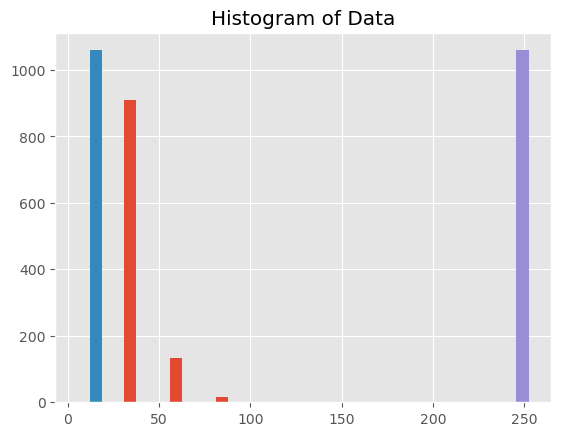

In [184]:
plt.hist(arry_data, bins=10)
plt.title('Histogram of Data')
plt.show()

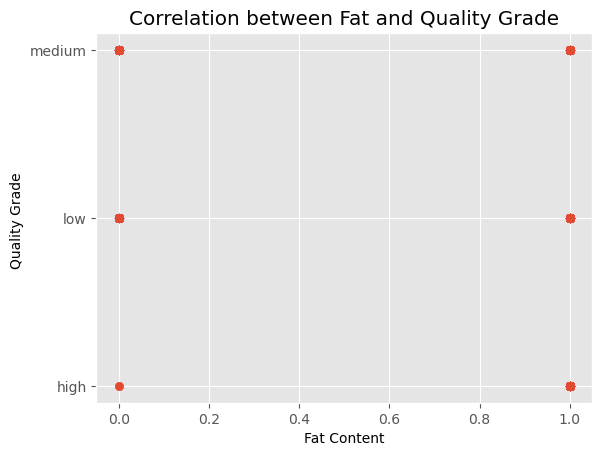

In [185]:
# plot a scatter plot to visualize any correlation between fat and quaity grade 
plt.scatter(data_cp['Fat'], data_cp['Grade'])
plt.xlabel('Fat Content')
plt.ylabel('Quality Grade ')
plt.title('Correlation between Fat and Quality Grade')
plt.show()

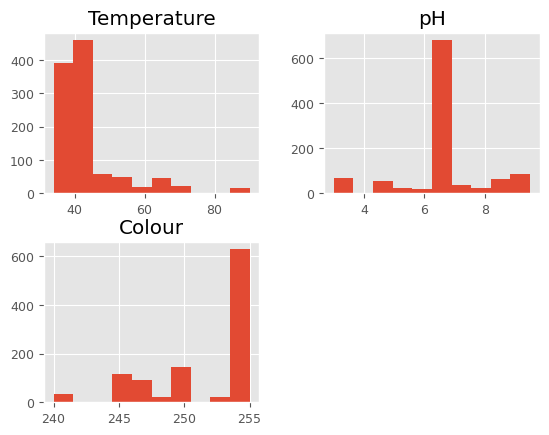

In [186]:
arry_data.hist(xlabelsize=9,ylabelsize=9)
plt.show()

In [187]:
from numpy import asarray
nd_array_data = asarray(arry_data)
print(nd_array_data)

[[ 35.    6.6 254. ]
 [ 36.    6.6 253. ]
 [ 70.    8.5 246. ]
 ...
 [ 40.    3.  255. ]
 [ 43.    6.8 250. ]
 [ 55.    8.6 255. ]]


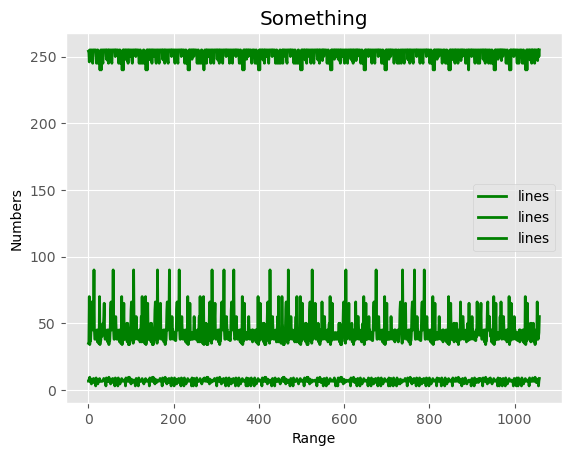

In [188]:
style.use('ggplot')
plt.plot(nd_array_data,'g',label='lines',linewidth=2)
plt.xlabel("Range")
plt.ylabel("Numbers")
plt.title("Something")
plt.legend()
plt.show()

# **Train & Evaluate the Model**
Metrics such as accuracy, precision, and recall can be used measure the performance of the model.

In [189]:
# Split the dataset into features(to use to predict) and target variable(to predict)
X = data_cp.drop(['Grade'], axis=1)
y = data_cp['Grade'].astype(str)

In [190]:
print(X.columns)

Index(['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour'], dtype='object')


Support Vector Machines (SVM) is sensitive to differences in scale and distribution, so using a scaler-object we can: standardize and normalize the features.

In [191]:
# Split the data into training and testing sets
# and in order to prevent DataLeakage we shall split the data first 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)

In [192]:
LE_transformation = LabelEncoder()
LE_transformation.fit(y_train)
y_train = LE_transformation.transform(y_train)
y_test = LE_transformation.transform(y_test)

In [193]:
# Defining various of transforms
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler(feature_range=(1,2))
# we won't use Roubust scaler because there was no outlier data in our dataset
power_transformer = PowerTransformer(method="box-cox")

finding numerical colomns of the splitted data in order to do numerical transforms

In [194]:
numerical_cols = ["Temperature", "pH", "Colour"]

Modeling without data transformation

In [195]:
# Model defined
model = KNeighborsClassifier()
# Model fitted
model.fit(X_train,y_train)
# Prediction
yhat = model.predict(X_test)
print(f"accuracy :{accuracy_score(y_test,yhat)*100:.2f}")

accuracy :99.14


Now with standardization on numerical data

In [196]:
# transform the data
transforms = [('numtrain',StandardScaler(),numerical_cols)]
col_transform = ColumnTransformer(transformers=transforms)
# Model defined
model = KNeighborsClassifier()
pipKN = Pipeline(steps=[('prep',col_transform), ('m', model)])
# Model fitted
pipKN.fit(X_train,y_train)
# Evaluate the prediction precentage
yhat = pipKN.predict(X_test)
print(f"accuracy :{accuracy_score(y_test,yhat)*100:.2f}")
print("*"*70)
print(classification_report(y_test, yhat))

accuracy :91.14
**********************************************************************
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        88
           1       1.00      0.99      1.00       144
           2       0.84      0.91      0.87       118

    accuracy                           0.91       350
   macro avg       0.90      0.89      0.90       350
weighted avg       0.91      0.91      0.91       350



Now we do the modeling and evaluation with normalization and standardization

In [197]:
# transform the data
transforms = [('numtrain',StandardScaler(),numerical_cols),("numtrain2",MinMaxScaler(),numerical_cols)]
col_transform = ColumnTransformer(transformers=transforms)
# Model defined
model = KNeighborsClassifier()
pipKN2 = Pipeline(steps=[('prep',col_transform), ('m', model)])
# Model fitted
pipKN2.fit(X_train,y_train)
# Evaluate the prediction precentage
yhat = pipKN2.predict(X_test)
print(f"accuracy :{accuracy_score(y_test,yhat)*100:.2f}")
print("*"*70)
print(classification_report(y_test, yhat))

accuracy :91.14
**********************************************************************
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        88
           1       1.00      0.99      1.00       144
           2       0.84      0.91      0.87       118

    accuracy                           0.91       350
   macro avg       0.90      0.89      0.90       350
weighted avg       0.91      0.91      0.91       350



Logistic regression will be defined and evaluated in the exact same way

In [198]:
# Model defined
model = LogisticRegression()
# Model fitted
model.fit(X_train,y_train)
# Evaluate the prediction precentage
yhat = model.predict(X_test)
print(f"accuracy :{accuracy_score(y_test,yhat)*100:.2f}")
print("*"*70)
print(classification_report(y_test, yhat))

accuracy :74.86
**********************************************************************
              precision    recall  f1-score   support

           0       0.75      0.58      0.65        88
           1       0.82      0.74      0.77       144
           2       0.69      0.89      0.78       118

    accuracy                           0.75       350
   macro avg       0.75      0.74      0.74       350
weighted avg       0.76      0.75      0.74       350



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [199]:
# transform the data
transforms = [('numtrain',StandardScaler(),numerical_cols)]
col_transform = ColumnTransformer(transformers=transforms)
# Model defined
model = LogisticRegression()
pipLR = Pipeline(steps=[('prep',col_transform), ('m', model)])
# Model fitted
pipLR.fit(X_train,y_train)
# Evaluate the prediction precentage
yhat = pipLR.predict(X_test)
print(f"accuracy :{accuracy_score(y_test,yhat)*100:.2f}")
print("*"*10)
print(classification_report(y_test, yhat))

accuracy :59.14
**********
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.70      0.75      0.72       144
           2       0.51      0.84      0.63       118

    accuracy                           0.59       350
   macro avg       0.40      0.53      0.45       350
weighted avg       0.46      0.59      0.51       350



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now we do the same normalization and standardization on logisic regression

In [205]:
transforms = [('numtrain',StandardScaler(),numerical_cols),("numtrain2",MinMaxScaler(),numerical_cols)]
col_transform = ColumnTransformer(transformers=transforms)
# Model defined
model = LogisticRegression()
pipLR2 = Pipeline(steps=[('prep',col_transform), ('m', model)])
# Model fitted
pipLR2.fit(X_train,y_train)
# Evaluate the prediction precentage
yhat = pipLR2.predict(X_test)
print(f"accuracy :{accuracy_score(y_test,yhat)*100:.2f}")
print("*"*70)
print(classification_report(y_test, yhat))

accuracy :59.14
**********************************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.70      0.75      0.72       144
           2       0.51      0.84      0.63       118

    accuracy                           0.59       350
   macro avg       0.40      0.53      0.45       350
weighted avg       0.46      0.59      0.51       350



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [201]:
# Train and evaluate a support vector machine classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy of SVM classifier: {:.2f}%".format(accuracy_svm * 100))
print('------------------------------------------------------------------')
print(classification_report(y_test, y_pred_svm))

Accuracy of SVM classifier: 87.43%
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        88
           1       0.95      0.88      0.92       144
           2       0.89      0.87      0.88       118

    accuracy                           0.87       350
   macro avg       0.87      0.87      0.87       350
weighted avg       0.88      0.87      0.88       350



In [202]:
transforms = [('numtrain',StandardScaler(),numerical_cols)]
col_transform = ColumnTransformer(transformers=transforms)
# Train and evaluate a support vector machine classifier
model = SVC(kernel='linear')
pipSVM = Pipeline(steps=[('prep',col_transform), ('m', model)])
pipSVM.fit(X_train, y_train)
# Model fitted
pipSVM.fit(X_train,y_train)
# Evaluate the prediction precentage
yhat = pipSVM.predict(X_test)
print(f"accuracy :{accuracy_score(y_test,yhat)*100:.2f}")
print("*"*70)
print(classification_report(y_test, yhat))

accuracy :64.00
**********************************************************************
              precision    recall  f1-score   support

           0       0.23      0.10      0.14        88
           1       0.88      0.78      0.82       144
           2       0.56      0.87      0.68       118

    accuracy                           0.64       350
   macro avg       0.56      0.58      0.55       350
weighted avg       0.61      0.64      0.61       350



In [206]:
# Perform random classifier classification
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy of Random Forest classifier: {:.2f}%".format(accuracy_rf * 100))
print('------------------------------------------------------------------')
print(classification_report(y_test, y_pred_rf))

Accuracy of Random Forest classifier: 100.00%
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       118

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



In [207]:
transforms = [('numtrain',StandardScaler(),numerical_cols)]
col_transform = ColumnTransformer(transformers=transforms)
# define the model
model = RandomForestClassifier(random_state=42)
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])
pipeline.fit(X_train, y_train)
yhat = pipeline.predict(X_test)
print(f"accuracy :{accuracy_score(y_test,yhat)*100:.2f}")
print("*"*70)
print(classification_report(y_test, yhat))

accuracy :93.14
**********************************************************************
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        88
           1       1.00      0.99      1.00       144
           2       0.90      0.90      0.90       118

    accuracy                           0.93       350
   macro avg       0.92      0.92      0.92       350
weighted avg       0.93      0.93      0.93       350

